# This is the tutorial for RDkit

All important Libraries to the code

In [4]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw 

#IPythonConsole.ipython_useSVG=True 
#IPythonConsole.drawOptions.addAtomIndices = True # wstawia oznaczenia przy atomach węgla

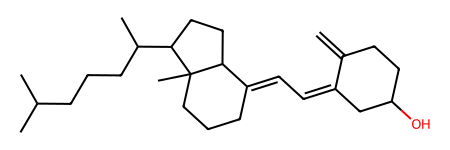

In [5]:
# Konwersja napisu w formacie SMILES do obiektu Mol
cholecalciferol_classic = Chem.MolFromSmiles('CC(C)CCCC(C)C1CCC2C1(CCCC2=CC=C3CC(CCC3=C)O)C')
# Wyświetlenie w formie graficznej
cholecalciferol_classic


In [ ]:
# Funkcja, która nadaje index poszczególnym atomom węgla
def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

# Z indexami atomów
mol_with_atom_index(cholecalciferol_classic)

In [32]:
# Zwraca liczbę atomów w danej strukturze
cholecalciferol_classic.GetNumAtoms()

3

In [ ]:
acetone = Chem.MolFromSmiles('CC(=O)C')
# Zwraca liczbę wiązań C-C typu sigma w danej cząsteczce
acetone.GetNumBonds() #3

In [36]:
# konwersja pliku w formacie PDB do obiektu Mol
mushroom = Chem.MolFromPDBFile(r'C:\Python - skrypty\Notatki do Pythona\RD-Kit\5gy6.pdb')
# Zwraca liczbę atomów w tej strukturze
mushroom.GetNumAtoms()

780

In [44]:
# wyciągamy z pliku PDB informacje o poszczególnych jednostkach tworzących białko
# w tym wypadku są to aminokwasy
# residues to lista obiektów klasy rdkit.Chem.rdchem.AtomPDBResidueInfo 

residues = [atom.GetPDBResidueInfo() for atom in mushroom.GetAtoms()]

# Z każdej instancji tej klasy wyciągamy numer i nazwę aminokwasu
# resinf to lista zbiorów par numer - nazwa aminokwasu 

resinf = [(res.GetResidueNumber(), res.GetResidueName()) for res in residues]

# Z uwagi na długość tej listy i szereg powtarzających się elementów można ją posortować
# konwersja do typu set usuwa powtrzające się wartości więc widzimy ile czego jest
# funkcja sorted porządkuje ze względu na pierwszy element (numery rosnąco)
residues = sorted(set(resinf)) 
len(residues) # Output: 209

residues[:6]

[(3, 'GLY'), (4, 'GLY'), (5, 'CYS'), (6, 'SER'), (7, 'CYS'), (8, 'ALA')]

# Grupy funkcyjne 

In [ ]:
'''
Abbrev     SMILES
--------   --------
CO2Et      *C(=O)OCC
COOEt      *C(=O)OCC
OiBu       *OCC(C)C
nDec       *CCCCCCCCCC
nNon       *CCCCCCCCC
nOct       *CCCCCCCC
nHept      *CCCCCCC
nHex       *CCCCCC
nPent      *CCCCC
iPent      *C(C)CCC
tBu        *C(C)(C)C
iBu        *C(C)CC
nBu        *CCCC
iPr        *C(C)C
nPr        *CCC
Et         *CC
NCF3       *NC(F)(F)F
CF3        *C(F)(F)F
CCl3       *C(Cl)(Cl)Cl
CN         *C#N
NC         *[N+]#[C-]
N(OH)CH3   *N(C)[OH]
NO2        *[N+](=O)[O-]
NO         *N=O
SO3H       *S(=O)(=O)[OH]
CO2H       *C(=O)[OH]
COOH       *C(=O)[OH]
OEt        *OCC
OAc        *OC(C)=O
NHAc       *NC(C)=O
Ac         *C(C)=O
CHO        *C=O
NMe        *NC
SMe        *SC
OMe        *OC
CO2-       *C(=O)[O-]
COO-       *C(=O)[O-]

'''
